## Analysis of the network
Using networksx

### Imports

In [1]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import powerlaw
from statistics import mean

### Defining G graph

In [2]:
edges_df = pd.read_csv("edges.csv")
#edges_df
G = nx.from_pandas_edgelist(edges_df,"Source","Target",create_using=nx.DiGraph)
#nx.draw(G,with_labels=True)

### Information about the graph

In [3]:
def info(G):
    print(nx.info(G))
info(G)

DiGraph with 7583 nodes and 197415 edges


### Diameter

In [4]:
def calc_diameter(G):
    return max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
calc_diameter(G)

9

### Clustering Coefficient

In [5]:
def calc_c(G):
    clustering_coefficient = []
    for node in G.nodes():
        neighbours=[n for n in nx.neighbors(G,node)]
        n_neighbors=len(neighbours)
        n_links=0
        if n_neighbors>1:
            for node1 in neighbours:
                for node2 in neighbours:
                    if G.has_edge(node1,node2):
                        n_links+=1
            n_links/=2 #because n_links is calculated twice
            clustering_coefficient.append(n_links/(0.5*n_neighbors*(n_neighbors-1)))
        else:
            clustering_coefficient.append(0)
    return clustering_coefficient
clustering_coefficient = calc_c(G)
clustering_coefficient

[0.024546015875495646,
 0.17867867867867868,
 0.12852112676056338,
 0.2,
 0.0777474816329622,
 0.1408199643493761,
 0.09761904761904762,
 0.20909090909090908,
 0.09892435196614353,
 0.19515669515669515,
 0.22826086956521738,
 0.15058823529411763,
 0.12923351158645277,
 0.17582417582417584,
 0.02083944037308461,
 0.38095238095238093,
 0.12691521961184882,
 0.23170731707317074,
 0.75,
 0.15714285714285714,
 0.35714285714285715,
 0.17663344407530454,
 0.23198198198198197,
 0.16578947368421051,
 0.07818590704647677,
 0.12657184085755516,
 0.2080808080808081,
 0.14589371980676327,
 0.2857142857142857,
 0.16666666666666666,
 0.2564102564102564,
 0.2894736842105263,
 0.280225988700565,
 0.1519230769230769,
 0.1976190476190476,
 0.11706730769230769,
 0.13833333333333334,
 0.058771929824561406,
 0.22857142857142856,
 0.11688311688311688,
 0.11046171829339567,
 0.0827438844680224,
 0.07648298705209275,
 0.5,
 0.25274725274725274,
 0.12026515151515152,
 0,
 0.1140432098765432,
 0.4,
 0.1408106219

In [6]:
def c_avg(clustering_coefficient):
    return mean(clustering_coefficient)
c_avg(clustering_coefficient)

0.21148912609797446

### Average Shortest Path Length
waiting for forum

In [7]:
average_shortest_path_length = nx.average_shortest_path_length(G)

NetworkXError: Graph is not weakly connected.

### Histogram

c:\Users\yumi4\wikipedia-usage-network\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


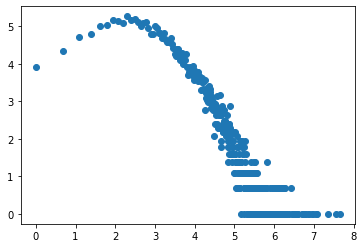

In [8]:
def degree_hist(G):
    degree_hist = nx.degree_histogram(G)
    k_list = np.arange(0,len(degree_hist))
    plt.scatter(np.log(k_list),np.log(degree_hist))
degree_hist(G)

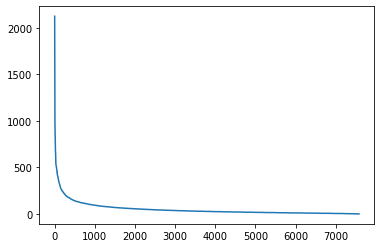

In [9]:
def degree_seq(G):
    degree_sequence = sorted([d for n,d in G.degree()],reverse=True)
    plt.plot(degree_sequence)
    return degree_sequence
degree_sequence=degree_seq(G)

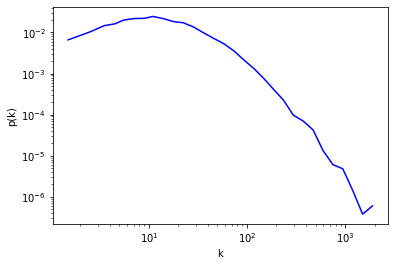

In [10]:
def degree_fig(degree_sequence):
    figPDF = powerlaw.plot_pdf(degree_sequence,color='b')
    figPDF.set_ylabel(r"p(k)")
    figPDF.set_xlabel(r"k")
degree_fig(degree_sequence)

In [11]:
def power_law_fit(degree_sequence):
    fit = powerlaw.Fit(degree_sequence,discrete=True)
    gamma = fit.power_law.alpha
    print("gamma=",gamma)
power_law_fit(degree_sequence)

Calculating best minimal value for power law fit
gamma= 2.791599440301634
